In [1]:
import networkx as nx
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (20,12)

class DevNull(object):
    def write(self,arg):
        pass
    
import sys
#sys.stdout = DevNull()

# Assessing a Brain-based Disease Readout
## Given a recording strategy, what's a reasonable expectation?

## Overview
Often we don't get to decide the number and locations of recording electrodes without heavy constraints.
Many factors go into deciding a recording setup and the resulting effort to identify a *readout* is undoubtedly affected.
In this notebook I outline an approach to objectively set a theoretical upper-limit for a readout's performance measure given a recording setup in a simulated brain network.

![]()

In [2]:
class b_b_model:
    def __init__(self,N=500,M=2):
        self.N = N
        self.gamma = np.random.normal(0,1.0,size=(N,1)) * np.random.choice([0,1,2],p=[450/500,45/500,5/500],size=(N,1))
        self.contrib_regions = gamma != 0
        
        H = np.zeros((N,1))
        self.H_gamma_mask = np.copy(gamma != 0)
        
        self.H_perfect = np.copy(H)
        self.H_perfect[gamma!=0] = 1

        
        self.M = M
        #find the M most important regions
        top_gammas = (-self.gamma.squeeze()).argsort()[:M]
        
        
        self.H_oracle = np.copy(H)
        self.H_oracle[top_gammas] = 1

        self.H_random = np.copy(H)
        self.H_random[:M] = 1
    
    def analysis(self,H,do_plot=False):
        coverage = np.dot(H.astype(np.int).T,contrib_regions.astype(np.int))/np.sum(contrib_regions)
        peak_energy = (np.dot(H.T,np.abs(gamma)))/(np.linalg.norm(gamma)*np.linalg.norm(H))

        if do_plot:
            print('Coverage',coverage, ' of ', np.sum(contrib_regions))
            print('H onto gamma Energy:',peak_energy)

            plt.figure() 
            plt.plot(H,color='green')
            plt.plot(contrib_regions,alpha=0.3,color='blue')

        return coverage,peak_energy


## Model
We'll have a set of 500 brain connected brain regions.
A behavior we're interested in arises from the coordinated activity of 50 of those brain regions.
First we'll set up a distribution where 2 of those 50 regions account for ~80% of the total behavioral signal.

In [6]:
N = 500
gamma = np.random.normal(0,1.0,size=(N,1)) * np.random.choice([0,1,2],p=[450/500,45/500,5/500],size=(N,1))
contrib_regions = gamma != 0

H = np.zeros((N,1))
H_gamma = np.copy(gamma != 0)
H_perfect = np.copy(H)
H_perfect[gamma!=0] = 1
#H = H_perfect

M = 2
#find the M most important regions
top_gammas = (-gamma.squeeze()).argsort()[:M]

H_oracle = np.copy(H)
H_oracle[top_gammas] = 1

H_random = np.copy(H)
H_random[:M] = 1

def analysis(H,do_plot=False):
    coverage = np.dot(H.astype(np.int).T,contrib_regions.astype(np.int))/np.sum(contrib_regions)
    peak_energy = (np.dot(H.T,np.abs(gamma)))/(np.linalg.norm(gamma)*np.linalg.norm(H))
    
    if do_plot:
        print('Coverage',coverage, ' of ', np.sum(contrib_regions))
        print('H onto gamma Energy:',peak_energy)
        
        plt.figure()
        plt.plot(H,color='green')
        plt.plot(contrib_regions,alpha=0.3,color='blue')

    return coverage,peak_energy
    #HYPOTH: ENERGY CORRESPONDS TO R^2
    
cov,pe = analysis(H_oracle)
print(cov,pe)

[[0.03636364]] [[0.26608142]]


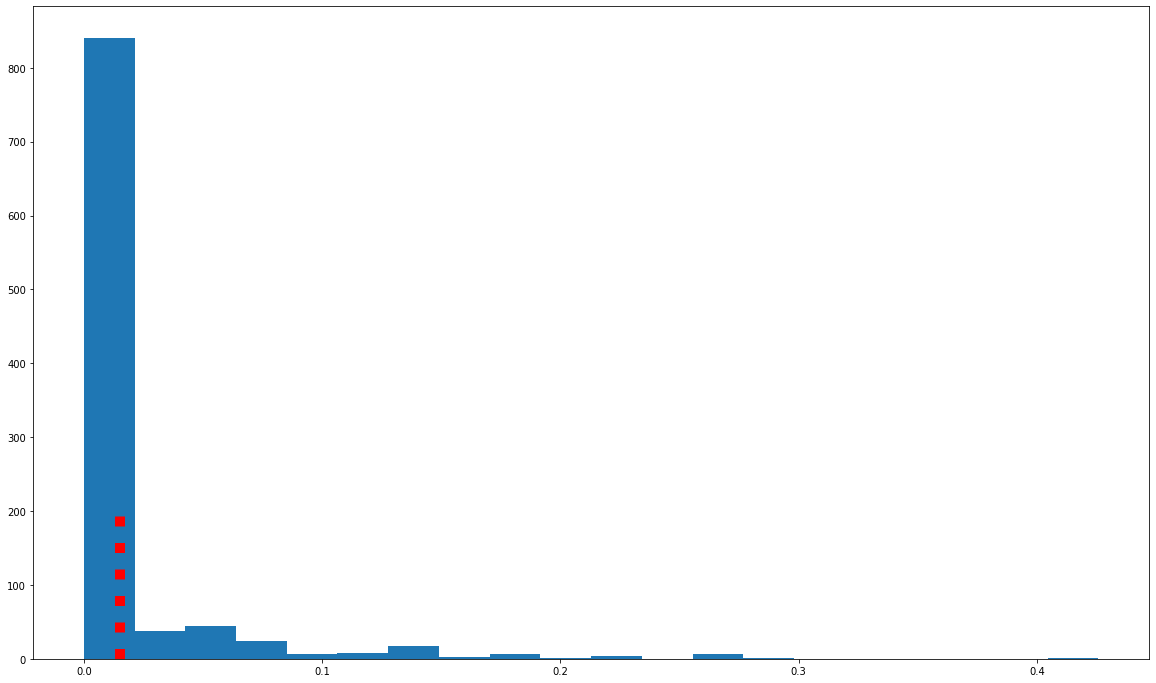

In [4]:
results = []
for ii in range(1000):
    H_random = np.zeros((N,1))
    rnd_idxs = random.sample(range(500),M)
    H_random[rnd_idxs] = 1
    results.append(analysis(H_random))

plt.figure()
plt.hist(np.array([b for a,b in results]).squeeze(),bins=20)
plt.vlines(np.mean(np.array([b for a,b in results])),0,200,linewidth=10,linestyle='dotted',color='red')
plt.show()

# Now with data
We're going to now use a "simulated" dataset of brain activity, behaviors, and measurements and apply the above analyses to see how we can derive an assessment through data instead of through model parameters.
The results in this section are completely congruent with the previous section for those that are sufficiently aware of and satisfied with the way the theory above will be applied.

## Assumed best-case readout model
First we'll just assume the readout model can achieve best-case and focus on $H$ itself instead of its study-specific decomposition (See below).

In [5]:
G = nx.erdos_renyi_graph(N,0.3)
L = nx.laplacian_matrix(G).todense()
H = 

x = np.random.multivariate_normal(np.zeros((N,)),L,size=(10,)).T

y = np.dot(H.T,x)
beta = np.dot(gamma.T,x)
print(x.shape)
plt.figure()
plt.scatter(y,beta)
plt.xlabel('Predicted')
plt.ylabel('Actual')

SyntaxError: invalid syntax (<ipython-input-5-e8129d9178a2>, line 3)

## With explicit readout modeling
In the above we assumed H is a subsampling of $\Gamma$'s columns.
However this is not realistic.
First, we have probes in individual brain regions, so any given column of H must have at most one '1' and all the rest are '0' to represent no probe.
Second, the readout itself is an analysis object that can have positives and negatives

## Take-aways
If you find a disease readout and want to figure out 'is this meaningful'? here are the steps you can take:

1. Find out what brain regions have been implicated in the disease you're studying
2. How many of those brain regions do you have probes in?
3. Calculate your *coverage*
4. Assume two things:
    1. Your *coverage* percentage $c$ is the top $c$% of brain regions contributing to the behavior of interest.
    2. Your *coverage* is a random $c$% of the brain regions involved in the disease process.
5. Your upper and lower limits can be calculated as the 